In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data = pd.read_csv("/content/heart_disease.csv")
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


**BASIC INSIGHTS**

**i)** Number of rows and columns:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

**ii)** Summary statistics of numerical columns:

In [ ]:
data.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [ ]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

**iii)** Count of unique values in Gender and Smoking columns:

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,5003
Female,4978


In [ ]:
data['Smoking'].value_counts()

,count
Smoking,
Yes,5123
No,4852


**HANDLING MISSING VALUES**

**i)** Checking for missing values:


In [ ]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


**ii)** Handling missing values:

In [ ]:
data.fillna({
    'Age': data['Age'].mean(),
    'Cholesterol Level': data['Cholesterol Level'].median(),
    'Gender': data['Gender'].mode()[0],
    'Smoking': data['Smoking'].mode()[0]
}, inplace=True)

print("Missing values handled.\n")


Missing values handled.



Just to ensure that all missing values are handled.

In [ ]:
data['Smoking'].isna()

,Smoking
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
data['Gender'].isna()

,Gender
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
data['Age'].isna()

,Age
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
data['Cholesterol Level'].isna()

,Cholesterol Level
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


**DATA VISUALIZATION**

**i)** Histogram of Age:

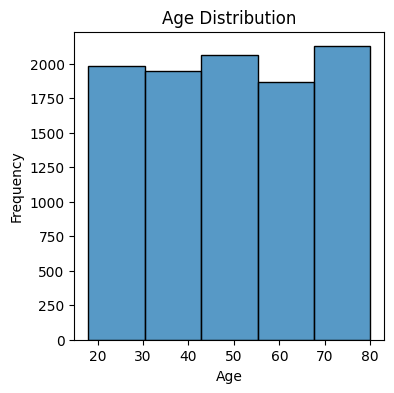

In [ ]:
plt.figure(figsize=(4,4))
sns.histplot(data['Age'],bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**ii)** Bar chart for Heart Disease count:

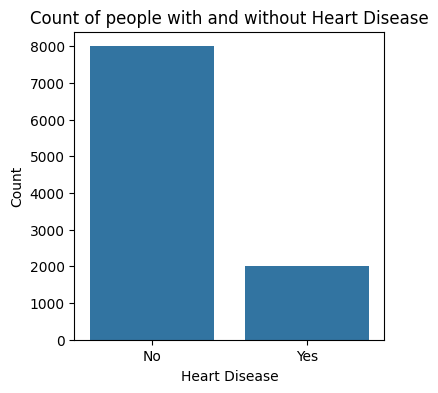

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="Heart Disease Status",data=data)
plt.title('Count of people with and without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

**iii)** Box plot of Cholesterol Level:

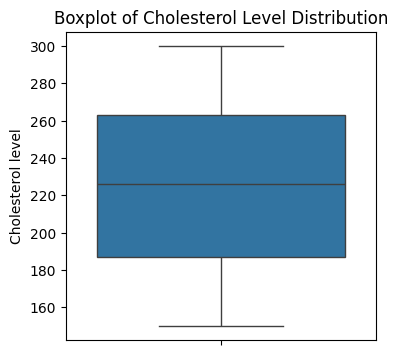

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(y="Cholesterol Level",data=data)
plt.title('Boxplot of Cholesterol Level Distribution')
plt.ylabel('Cholesterol level')
plt.show()

**ANALYSIS:** Any cholesterol level below 73.0 or above 377.0 would be considered an outlier. However, the results show that no data points fall outside this range, meaning there are no outliers in the cholesterol level distribution.
This suggests that the cholesterol levels in the dataset are well-distributed without extreme variations. It indicates that the dataset is consistent and reliable, with no exceptionally high or low cholesterol values that might require further data cleaning or special handling.

Did the quartiles working just to confirm for outliers.

In [ ]:
Q1 = data['Cholesterol Level'].quantile(0.25)
Q3 = data['Cholesterol Level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
outliers = data[(data['Cholesterol Level'] < lower_bound) | (data['Cholesterol Level'] > upper_bound)]

print("\nOutliers in Cholesterol Level:")
print(outliers[['Cholesterol Level']])

Q1: 187.0
Q3: 263.0
IQR: 76.0
Lower Bound: 73.0
Upper Bound: 377.0

Outliers in Cholesterol Level:
Empty DataFrame
Columns: [Cholesterol Level]
Index: []
